In [1]:
pip install seaborn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import packages

import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# read in data
zoo = pd.read_csv('zoo.csv')
zoo_class = pd.read_csv('class.csv')

In [4]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:

zoo_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [6]:
zoo.shape

(101, 18)

In [7]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
# create a dictionary for the actual label names
class_dict = dict(zip(zoo_class.Class_Number, zoo_class.Class_Type))

# Map the dictionary onto the class_type column in the zoo dataframe
zoo['class_label'] = zoo['class_type'].map(class_dict)

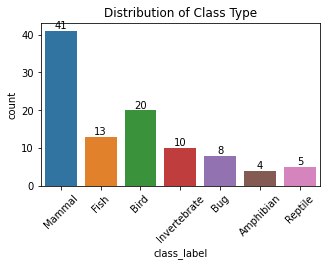

In [9]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=zoo, x='class_label')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Class Type')
plt.xticks(rotation=45)
plt.show()

In [10]:
corr_mx = zoo.drop(columns = ['animal_name', 'class_type', 'class_label']).corr()

In [11]:
corr_mx_long = corr_mx.reset_index().rename(
    columns = {'index': 'row'}
).melt(
    id_vars = 'row',
    var_name = 'col',
    value_name = 'Correlation'
)

# build altair plot
alt.Chart(corr_mx_long).mark_rect().encode(
    x = alt.X('col', title = '', sort = {'field': 'Correlation', 'order': 'ascending'}),
    y = alt.Y('row', title = '', sort = {'field': 'Correlation', 'order': 'ascending'}),
    color = alt.Color('Correlation',
    scale = alt.Scale(scheme = 'blueorange', # choose a diverging gradient
    domain = (-1, 1), 
    type = 'sqrt'), 
    legend = alt.Legend(tickCount = 5))
).properties(width = 300, height = 300)

alt.Chart(...)

Creating a Model

In [12]:
# define target variable and feature variables
zoo_x = zoo.drop(columns = ['class_type', 'class_label'])
zoo_y = zoo['class_type']

In [13]:
zoo_x.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [14]:
zoo_y.head()

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

In [15]:
# create train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(zoo_x, zoo_y, test_size=0.3, random_state=82, stratify=zoo_y)

In [16]:
name_train = X_tr['animal_name']
name_test = X_te['animal_name']

X_tr = X_tr.drop(columns = ['animal_name'])
X_te = X_te.drop(columns = ['animal_name'])

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=3, random_state=10)
clf.fit(X_tr, y_tr)

# predict, so we can see accuracy before visualizing
y_pred = clf.predict(X_te)

In [18]:
from sklearn import metrics

# check model accuracy
print("Accuracy:", round(metrics.accuracy_score(y_te, y_pred), 3))

Accuracy: 0.968


In [19]:
test_df = pd.DataFrame()
test_df['Animal Name'] = name_test

test_df['Actual'] = y_te
test_df['Actual'] = test_df['Actual'].map(class_dict)

test_df['Prediction'] = y_pred
test_df['Prediction'] = test_df['Prediction'].map(class_dict)

test_df['correct'] = test_df['Prediction'] == test_df['Actual']

In [20]:
test_df.head()

,Animal Name,Actual,Prediction,correct
68,pussycat,Mammal,Mammal,True
64,polecat,Mammal,Mammal,True
4,boar,Mammal,Mammal,True
29,girl,Mammal,Mammal,True
62,pitviper,Reptile,Reptile,True


In [21]:

test_df[test_df['correct'] == False]

,Animal Name,Actual,Prediction,correct
30,gnat,Bug,Bird,False


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 25, 50, 75, 100],
    "max_depth": [5, 10, 15, 20]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy')

grid.fit(X_tr, y_tr)

grid.best_params_ 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 5, 'n_estimators': 25}

In [23]:
# retrain with more estimators
clf = RandomForestClassifier(n_estimators=20, max_depth= 5, random_state=82)
clf.fit(X_tr, y_tr)

y_pred = clf.predict(X_te)

# check model accuracy
print("Accuracy:", round(metrics.accuracy_score(y_te, y_pred), 3))

Accuracy: 1.0


In [24]:
features = X_te.columns

important = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False).to_frame(name='importance')

important.reset_index(inplace=True)

important

,index,importance
0,milk,0.181581
1,hair,0.130985
2,toothed,0.099593
3,backbone,0.091535
4,fins,0.082688
5,feathers,0.079168
6,eggs,0.071910
7,legs,0.069666
8,breathes,0.050377
9,airborne,0.038319


In [25]:
def predict_animal(Legs, Hair, Feathers, Eggs, Milk, Airborne, Aquatic, Predator, Toothed, Backbone, Breathes, Venomous, Fins, Tail, Domestic, Catsize):
    hair = 1 if Hair else 0
    feathers = 1 if Feathers else 0 
    eggs = 1 if Eggs else 0
    milk =  1 if Milk else 0
    airborne = 1 if Airborne else 0 
    aquatic = 1 if Aquatic else 0 
    predator = 1 if Predator else 0 
    toothed = 1 if Toothed else 0
    backbone = 1 if Backbone else 0 
    breathes = 1 if Breathes else 0 
    venomous = 1 if Venomous else 0
    fins = 1 if Fins else 0 
    legs = Legs
    tail = 1 if Tail else 0 
    domestic = 1 if Domestic else 0 
    catsize = 1 if Catsize else 0 

    new_data = [[hair, feathers, eggs, milk, airborne, aquatic, predator,
                 toothed, backbone, breathes, venomous, fins, legs, tail,
                 domestic, catsize]]  
    
    prediction = clf.predict(new_data)

    predicted_class = class_dict.get(prediction[0])

    return predicted_class

In [26]:
import gradio as gr

demo = gr.Interface(
    fn = predict_animal,
    inputs=["number", "checkbox", "checkbox", "checkbox", "checkbox", "checkbox", "checkbox", "checkbox", "checkbox", 
            "checkbox", "checkbox", "checkbox", "checkbox", "checkbox", "checkbox", "checkbox"],
    outputs=["text"]
)

demo.launch()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [27]:
import joblib

joblib.dump(clf, 'rf_full.joblib')

['rf_full.joblib']